# Investment Case Group Project
## Undestanding data set
---

In [1]:
# Supress Warnings
import warnings
warnings.filterwarnings('ignore')

In [2]:
import numpy as np
import pandas as pd
# For plotting
import matplotlib.pyplot as plt
import seaborn as sns

#### Data frames prepration and data collection

In [3]:
companies = pd.read_csv("F:\\Upgrad\\Assigments\\Assignment1\\companies.txt",sep="\t",encoding='latin1')

In [4]:
companies.head()

,permalink,name,homepage_url,category_list,status,country_code,state_code,region,city,founded_at
0,/Organization/-Fame,#fame,http://livfame.com,Media,operating,IND,16,Mumbai,Mumbai,NaN
1,/Organization/-Qounter,:Qounter,http://www.qounter.com,Application Platforms|Real Time|Social Network...,operating,USA,DE,DE - Other,Delaware City,04-09-2014
2,/Organization/-The-One-Of-Them-Inc-,"(THE) ONE of THEM,Inc.",http://oneofthem.jp,Apps|Games|Mobile,operating,NaN,NaN,NaN,NaN,NaN
3,/Organization/0-6-Com,0-6.com,http://www.0-6.com,Curated Web,operating,CHN,22,Beijing,Beijing,01-01-2007
4,/Organization/004-Technologies,004 Technologies,http://004gmbh.de/en/004-interact,Software,operating,USA,IL,"Springfield, Illinois",Champaign,01-01-2010


In [5]:
companies.permalink = companies.permalink.apply(lambda x:x.lower())

In [6]:
companies.head()

,permalink,name,homepage_url,category_list,status,country_code,state_code,region,city,founded_at
0,/organization/-fame,#fame,http://livfame.com,Media,operating,IND,16,Mumbai,Mumbai,NaN
1,/organization/-qounter,:Qounter,http://www.qounter.com,Application Platforms|Real Time|Social Network...,operating,USA,DE,DE - Other,Delaware City,04-09-2014
2,/organization/-the-one-of-them-inc-,"(THE) ONE of THEM,Inc.",http://oneofthem.jp,Apps|Games|Mobile,operating,NaN,NaN,NaN,NaN,NaN
3,/organization/0-6-com,0-6.com,http://www.0-6.com,Curated Web,operating,CHN,22,Beijing,Beijing,01-01-2007
4,/organization/004-technologies,004 Technologies,http://004gmbh.de/en/004-interact,Software,operating,USA,IL,"Springfield, Illinois",Champaign,01-01-2010


In [7]:
companies.describe()

,permalink,name,homepage_url,category_list,status,country_code,state_code,region,city,founded_at
count,66368,66367,61310,63220,66368,59410,57821,58338,58340,51147
unique,66368,66102,61191,27296,4,137,311,1092,5111,3978
top,/organization/i-stand,Peach,http://www.askforoffer.com,Software,operating,USA,CA,SF Bay Area,San Francisco,01-01-2012
freq,1,4,5,3995,53034,37601,12900,8804,3526,2730


In [8]:
round(companies.isnull().sum()/len(companies.index)*100,2)

permalink         0.00
name              0.00
homepage_url      7.62
category_list     4.74
status            0.00
country_code     10.48
state_code       12.88
region           12.10
city             12.10
founded_at       22.93
dtype: float64

In [9]:
rounds2 = pd.read_csv("F:\\Upgrad\\Assigments\\Assignment1\\rounds2.csv",encoding = 'ISO-8859-1')

In [10]:
rounds2.head()

,company_permalink,funding_round_permalink,funding_round_type,funding_round_code,funded_at,raised_amount_usd
0,/organization/-fame,/funding-round/9a01d05418af9f794eebff7ace91f638,venture,B,05-01-2015,10000000.0
1,/ORGANIZATION/-QOUNTER,/funding-round/22dacff496eb7acb2b901dec1dfe5633,venture,A,14-10-2014,NaN
2,/organization/-qounter,/funding-round/b44fbb94153f6cdef13083530bb48030,seed,NaN,01-03-2014,700000.0
3,/ORGANIZATION/-THE-ONE-OF-THEM-INC-,/funding-round/650b8f704416801069bb178a1418776b,venture,B,30-01-2014,3406878.0
4,/organization/0-6-com,/funding-round/5727accaeaa57461bd22a9bdd945382d,venture,A,19-03-2008,2000000.0


In [11]:
rounds2.company_permalink = rounds2.company_permalink.apply(lambda x: x.lower())

In [12]:
rounds2.head()

,company_permalink,funding_round_permalink,funding_round_type,funding_round_code,funded_at,raised_amount_usd
0,/organization/-fame,/funding-round/9a01d05418af9f794eebff7ace91f638,venture,B,05-01-2015,10000000.0
1,/organization/-qounter,/funding-round/22dacff496eb7acb2b901dec1dfe5633,venture,A,14-10-2014,NaN
2,/organization/-qounter,/funding-round/b44fbb94153f6cdef13083530bb48030,seed,NaN,01-03-2014,700000.0
3,/organization/-the-one-of-them-inc-,/funding-round/650b8f704416801069bb178a1418776b,venture,B,30-01-2014,3406878.0
4,/organization/0-6-com,/funding-round/5727accaeaa57461bd22a9bdd945382d,venture,A,19-03-2008,2000000.0


In [13]:
round(rounds2.isnull().sum()/len(rounds2.index)*100,2)

company_permalink           0.00
funding_round_permalink     0.00
funding_round_type          0.00
funding_round_code         72.91
funded_at                   0.00
raised_amount_usd          17.39
dtype: float64

In [14]:
# removed funding round code as it is not essential
rounds2 = rounds2.drop(['funding_round_code'],axis = 1)

In [15]:
round(rounds2.isnull().sum()/len(rounds2.index),2)

company_permalink          0.00
funding_round_permalink    0.00
funding_round_type         0.00
funded_at                  0.00
raised_amount_usd          0.17
dtype: float64

In [16]:
rounds2

,company_permalink,funding_round_permalink,funding_round_type,funded_at,raised_amount_usd
0,/organization/-fame,/funding-round/9a01d05418af9f794eebff7ace91f638,venture,05-01-2015,10000000.0
1,/organization/-qounter,/funding-round/22dacff496eb7acb2b901dec1dfe5633,venture,14-10-2014,NaN
2,/organization/-qounter,/funding-round/b44fbb94153f6cdef13083530bb48030,seed,01-03-2014,700000.0
3,/organization/-the-one-of-them-inc-,/funding-round/650b8f704416801069bb178a1418776b,venture,30-01-2014,3406878.0
4,/organization/0-6-com,/funding-round/5727accaeaa57461bd22a9bdd945382d,venture,19-03-2008,2000000.0
...,...,...,...,...,...
114944,/organization/zzzzapp-com,/funding-round/8f6d25b8ee4199e586484d817bceda05,convertible_note,01-03-2014,41313.0
114945,/organization/zzzzapp-com,/funding-round/ff1aa06ed5da186c84f101549035d4ae,seed,01-05-2013,32842.0
114946,/organization/ãeron,/funding-round/59f4dce44723b794f21ded3daed6e4fe,venture,01-08-2014,NaN
114947,/organization/ãasys-2,/funding-round/35f09d0794651719b02bbfd859ba9ff5,seed,01-01-2015,18192.0


In [17]:
import re
rounds2['company_permalink'] = rounds2['company_permalink'].map(lambda x: re.sub(r'\W+', '/', x))
companies['permalink'] = companies['permalink'].map(lambda x: re.sub(r'\W+', '/', x))

In [18]:
rounds2

,company_permalink,funding_round_permalink,funding_round_type,funded_at,raised_amount_usd
0,/organization/fame,/funding-round/9a01d05418af9f794eebff7ace91f638,venture,05-01-2015,10000000.0
1,/organization/qounter,/funding-round/22dacff496eb7acb2b901dec1dfe5633,venture,14-10-2014,NaN
2,/organization/qounter,/funding-round/b44fbb94153f6cdef13083530bb48030,seed,01-03-2014,700000.0
3,/organization/the/one/of/them/inc/,/funding-round/650b8f704416801069bb178a1418776b,venture,30-01-2014,3406878.0
4,/organization/0/6/com,/funding-round/5727accaeaa57461bd22a9bdd945382d,venture,19-03-2008,2000000.0
...,...,...,...,...,...
114944,/organization/zzzzapp/com,/funding-round/8f6d25b8ee4199e586484d817bceda05,convertible_note,01-03-2014,41313.0
114945,/organization/zzzzapp/com,/funding-round/ff1aa06ed5da186c84f101549035d4ae,seed,01-05-2013,32842.0
114946,/organization/ã/eron,/funding-round/59f4dce44723b794f21ded3daed6e4fe,venture,01-08-2014,NaN
114947,/organization/ã/asys/2,/funding-round/35f09d0794651719b02bbfd859ba9ff5,seed,01-01-2015,18192.0


In [19]:
# Analysis of mean for columns  
rounds2.groupby(['funding_round_type'])['raised_amount_usd'].mean()

funding_round_type
angel                    9.586945e+05
convertible_note         1.453439e+06
debt_financing           1.704353e+07
equity_crowdfunding      5.383682e+05
grant                    4.300576e+06
non_equity_assistance    4.112031e+05
post_ipo_debt            1.687046e+08
post_ipo_equity          8.218249e+07
private_equity           7.330859e+07
product_crowdfunding     1.363131e+06
secondary_market         7.964963e+07
seed                     7.198180e+05
undisclosed              1.924237e+07
venture                  1.174895e+07
Name: raised_amount_usd, dtype: float64

In [20]:
# Analysis of mean and median
rounds2.groupby(['funding_round_type'])['raised_amount_usd'].median()

funding_round_type
angel                      400000.0
convertible_note           272000.0
debt_financing            1100000.0
equity_crowdfunding        100000.0
grant                      201684.0
non_equity_assistance       60000.0
post_ipo_debt            19950000.0
post_ipo_equity          12262852.5
private_equity           20000000.0
product_crowdfunding       183915.0
secondary_market         32600000.0
seed                       275000.0
undisclosed               1018680.0
venture                   5000000.0
Name: raised_amount_usd, dtype: float64

In [21]:
rounds2.shape

(114949, 5)

In [22]:
companies.shape

(66368, 10)

## Data understanding Table analysis

In [23]:
len(companies.permalink.unique())

66367

In [24]:
len(rounds2.company_permalink.unique())

66368

In [25]:
companies.loc[~rounds2.company_permalink.isin(companies.permalink)]

,permalink,name,homepage_url,category_list,status,country_code,state_code,region,city,founded_at
31863,/organization/lecere,lecere,http://www.lecere.com,Software,closed,USA,OR,"Portland, Oregon",Portland,NaN
45176,/organization/printivo,printivo,http://www.printivo.com,Business Services|E-Commerce|Printing,operating,NGA,5,Lagos,Lagos,20-12-2013
58473,/organization/tok3n,tok3n,http://www.tok3n.com/,Enterprise Security|Security|Web Development,closed,MEX,NaN,NaN,NaN,NaN


In [26]:
rounds2 =rounds2.rename({'company_permalink':'permalink'},axis = 1)

## Dataset analized as below

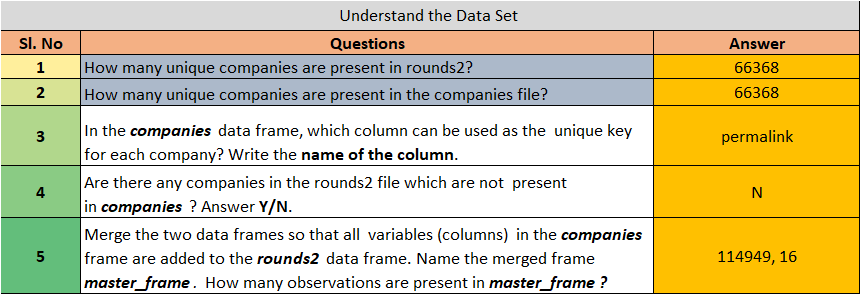

In [27]:
rounds2

,permalink,funding_round_permalink,funding_round_type,funded_at,raised_amount_usd
0,/organization/fame,/funding-round/9a01d05418af9f794eebff7ace91f638,venture,05-01-2015,10000000.0
1,/organization/qounter,/funding-round/22dacff496eb7acb2b901dec1dfe5633,venture,14-10-2014,NaN
2,/organization/qounter,/funding-round/b44fbb94153f6cdef13083530bb48030,seed,01-03-2014,700000.0
3,/organization/the/one/of/them/inc/,/funding-round/650b8f704416801069bb178a1418776b,venture,30-01-2014,3406878.0
4,/organization/0/6/com,/funding-round/5727accaeaa57461bd22a9bdd945382d,venture,19-03-2008,2000000.0
...,...,...,...,...,...
114944,/organization/zzzzapp/com,/funding-round/8f6d25b8ee4199e586484d817bceda05,convertible_note,01-03-2014,41313.0
114945,/organization/zzzzapp/com,/funding-round/ff1aa06ed5da186c84f101549035d4ae,seed,01-05-2013,32842.0
114946,/organization/ã/eron,/funding-round/59f4dce44723b794f21ded3daed6e4fe,venture,01-08-2014,NaN
114947,/organization/ã/asys/2,/funding-round/35f09d0794651719b02bbfd859ba9ff5,seed,01-01-2015,18192.0


In [28]:
# Merged two data frames companies and rounds2
master_frame= pd.merge(companies,rounds2,how='inner',on='permalink')

In [29]:
master_frame

,permalink,name,homepage_url,category_list,status,country_code,state_code,region,city,founded_at,funding_round_permalink,funding_round_type,funded_at,raised_amount_usd
0,/organization/fame,#fame,http://livfame.com,Media,operating,IND,16,Mumbai,Mumbai,NaN,/funding-round/9a01d05418af9f794eebff7ace91f638,venture,05-01-2015,10000000.0
1,/organization/qounter,:Qounter,http://www.qounter.com,Application Platforms|Real Time|Social Network...,operating,USA,DE,DE - Other,Delaware City,04-09-2014,/funding-round/22dacff496eb7acb2b901dec1dfe5633,venture,14-10-2014,NaN
2,/organization/qounter,:Qounter,http://www.qounter.com,Application Platforms|Real Time|Social Network...,operating,USA,DE,DE - Other,Delaware City,04-09-2014,/funding-round/b44fbb94153f6cdef13083530bb48030,seed,01-03-2014,700000.0
3,/organization/the/one/of/them/inc/,"(THE) ONE of THEM,Inc.",http://oneofthem.jp,Apps|Games|Mobile,operating,NaN,NaN,NaN,NaN,NaN,/funding-round/650b8f704416801069bb178a1418776b,venture,30-01-2014,3406878.0
4,/organization/0/6/com,0-6.com,http://www.0-6.com,Curated Web,operating,CHN,22,Beijing,Beijing,01-01-2007,/funding-round/5727accaeaa57461bd22a9bdd945382d,venture,19-03-2008,2000000.0
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
114943,/organization/zzzzapp/com,Zzzzapp Wireless ltd.,http://www.zzzzapp.com,Advertising|Mobile|Web Development|Wireless,operating,HRV,15,Split,Split,13-05-2012,/funding-round/8f6d25b8ee4199e586484d817bceda05,convertible_note,01-03-2014,41313.0
114944,/organization/zzzzapp/com,Zzzzapp Wireless ltd.,http://www.zzzzapp.com,Advertising|Mobile|Web Development|Wireless,operating,HRV,15,Split,Split,13-05-2012,/funding-round/ff1aa06ed5da186c84f101549035d4ae,seed,01-05-2013,32842.0
114945,/organization/ã/eron,ÃERON,http://www.aeron.hu/,NaN,operating,NaN,NaN,NaN,NaN,01-01-2011,/funding-round/59f4dce44723b794f21ded3daed6e4fe,venture,01-08-2014,NaN
114946,/organization/ã/asys/2,Ãasys,http://www.oasys.io/,Consumer Electronics|Internet of Things|Teleco...,operating,USA,CA,SF Bay Area,San Francisco,01-01-2014,/funding-round/35f09d0794651719b02bbfd859ba9ff5,seed,01-01-2015,18192.0


In [30]:
master_frame.shape

(114948, 14)

In [31]:
# As amount is too high rouded up to million USD
master_frame['raised_amount_usd']=master_frame['raised_amount_usd'].apply(lambda x:round(x/1000000,3))

In [32]:
master_frame = master_frame.rename({'raised_amount_usd':'raised_amount_mill_usd'},axis=1)

In [33]:
master_frame.head()

,permalink,name,homepage_url,category_list,status,country_code,state_code,region,city,founded_at,funding_round_permalink,funding_round_type,funded_at,raised_amount_mill_usd
0,/organization/fame,#fame,http://livfame.com,Media,operating,IND,16,Mumbai,Mumbai,NaN,/funding-round/9a01d05418af9f794eebff7ace91f638,venture,05-01-2015,10.000
1,/organization/qounter,:Qounter,http://www.qounter.com,Application Platforms|Real Time|Social Network...,operating,USA,DE,DE - Other,Delaware City,04-09-2014,/funding-round/22dacff496eb7acb2b901dec1dfe5633,venture,14-10-2014,NaN
2,/organization/qounter,:Qounter,http://www.qounter.com,Application Platforms|Real Time|Social Network...,operating,USA,DE,DE - Other,Delaware City,04-09-2014,/funding-round/b44fbb94153f6cdef13083530bb48030,seed,01-03-2014,0.700
3,/organization/the/one/of/them/inc/,"(THE) ONE of THEM,Inc.",http://oneofthem.jp,Apps|Games|Mobile,operating,NaN,NaN,NaN,NaN,NaN,/funding-round/650b8f704416801069bb178a1418776b,venture,30-01-2014,3.407
4,/organization/0/6/com,0-6.com,http://www.0-6.com,Curated Web,operating,CHN,22,Beijing,Beijing,01-01-2007,/funding-round/5727accaeaa57461bd22a9bdd945382d,venture,19-03-2008,2.000


## <font color = green >Checkpoint#1 over</font>

In [34]:
# Dropped columns which are not necessary for analysis
master_frame = master_frame.drop(['city','founded_at','funded_at','region','state_code'],axis=1)

In [35]:
master_frame.tail()

,permalink,name,homepage_url,category_list,status,country_code,funding_round_permalink,funding_round_type,raised_amount_mill_usd
114943,/organization/zzzzapp/com,Zzzzapp Wireless ltd.,http://www.zzzzapp.com,Advertising|Mobile|Web Development|Wireless,operating,HRV,/funding-round/8f6d25b8ee4199e586484d817bceda05,convertible_note,0.041
114944,/organization/zzzzapp/com,Zzzzapp Wireless ltd.,http://www.zzzzapp.com,Advertising|Mobile|Web Development|Wireless,operating,HRV,/funding-round/ff1aa06ed5da186c84f101549035d4ae,seed,0.033
114945,/organization/ã/eron,ÃERON,http://www.aeron.hu/,NaN,operating,NaN,/funding-round/59f4dce44723b794f21ded3daed6e4fe,venture,NaN
114946,/organization/ã/asys/2,Ãasys,http://www.oasys.io/,Consumer Electronics|Internet of Things|Teleco...,operating,USA,/funding-round/35f09d0794651719b02bbfd859ba9ff5,seed,0.018
114947,/organization/ä/novatiff/reklam/ve/tanä/tä/m/h...,Ä°novatiff Reklam ve TanÄ±tÄ±m Hizmetleri Tic,http://inovatiff.com,Consumer Goods|E-Commerce|Internet,operating,NaN,/funding-round/af942869878d2cd788ef5189b435ebc4,grant,0.015


In [36]:
round((master_frame.isnull().sum()/len(master_frame.index))*100,2)

permalink                   0.00
name                        0.00
homepage_url                5.34
category_list               2.97
status                      0.00
country_code                7.55
funding_round_permalink     0.00
funding_round_type          0.00
raised_amount_mill_usd     17.39
dtype: float64

In [37]:
master_frame.shape

(114948, 9)

In [38]:
# Status closed data is of no use so removed them
master_frame=master_frame[master_frame['status']!='closed']

In [39]:
master_frame.shape

(106227, 9)

In [40]:
master_frame.isnull().sum()

permalink                      0
name                           0
homepage_url                5314
category_list               2385
status                         0
country_code                6831
funding_round_permalink        0
funding_round_type             0
raised_amount_mill_usd     18323
dtype: int64

In [41]:
# Raised amount is not menitoned in data frame this data is of no use
master_frame =master_frame[~np.isnan(master_frame['raised_amount_mill_usd'])]

In [42]:
# Raised amount can be repoaced with mean and median by using below already tried but not much improvement 
#master_frame = master_frame.replace(np.nan, master_frame['raised_amount_mill_usd'].median())

In [43]:
round((master_frame.isnull().sum()/len(master_frame.index))*100,2)

permalink                  0.00
name                       0.00
homepage_url               4.31
category_list              0.72
status                     0.00
country_code               5.26
funding_round_permalink    0.00
funding_round_type         0.00
raised_amount_mill_usd     0.00
dtype: float64

In [44]:
# Removal of nan values from data frame

master_frame = master_frame[pd.notnull(master_frame['country_code'])]


In [45]:
master_frame.shape

(83278, 9)

In [46]:
# URL's are also not required for our analysis
master_frame=master_frame.drop(['homepage_url'],axis=1)

In [47]:
# Almost data is clean 
round((master_frame.isnull().sum()/len(master_frame.index))*100,2)

permalink                  0.00
name                       0.00
category_list              0.52
status                     0.00
country_code               0.00
funding_round_permalink    0.00
funding_round_type         0.00
raised_amount_mill_usd     0.00
dtype: float64

In [48]:
master_frame.groupby('funding_round_type')['raised_amount_mill_usd'].mean()

funding_round_type
angel                      0.994756
convertible_note           1.340013
debt_financing            17.891010
equity_crowdfunding        0.511266
grant                      4.286176
non_equity_assistance      0.460610
post_ipo_debt            175.469739
post_ipo_equity           67.093605
private_equity            75.797196
product_crowdfunding       1.521047
secondary_market          94.089400
seed                       0.763097
undisclosed               16.018211
venture                   11.903222
Name: raised_amount_mill_usd, dtype: float64

In [49]:
master_frame = master_frame[pd.notnull(master_frame['country_code'])]

In [50]:
master_frame.shape

(83278, 8)

In [51]:
len(master_frame.name.unique())

45322

In [52]:
round(master_frame.groupby('funding_round_type')['raised_amount_mill_usd'].mean(),2)

funding_round_type
angel                      0.99
convertible_note           1.34
debt_financing            17.89
equity_crowdfunding        0.51
grant                      4.29
non_equity_assistance      0.46
post_ipo_debt            175.47
post_ipo_equity           67.09
private_equity            75.80
product_crowdfunding       1.52
secondary_market          94.09
seed                       0.76
undisclosed               16.02
venture                   11.90
Name: raised_amount_mill_usd, dtype: float64

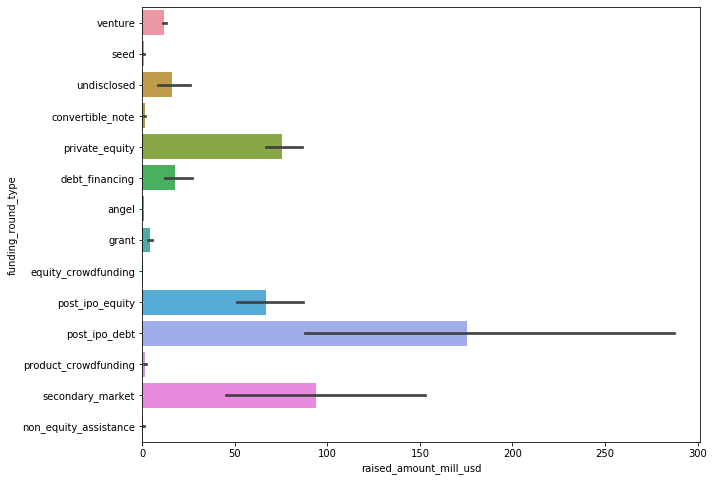

In [53]:
plt.figure(figsize=(10, 8))
sns.barplot(x='raised_amount_mill_usd',y='funding_round_type',data=master_frame)
plt.show()

In [54]:
master_frame.groupby('funding_round_type')['raised_amount_mill_usd'].mean().between(5.0,15.0,inclusive = 'True')

funding_round_type
angel                    False
convertible_note         False
debt_financing           False
equity_crowdfunding      False
grant                    False
non_equity_assistance    False
post_ipo_debt            False
post_ipo_equity          False
private_equity           False
product_crowdfunding     False
secondary_market         False
seed                     False
undisclosed              False
venture                   True
Name: raised_amount_mill_usd, dtype: bool


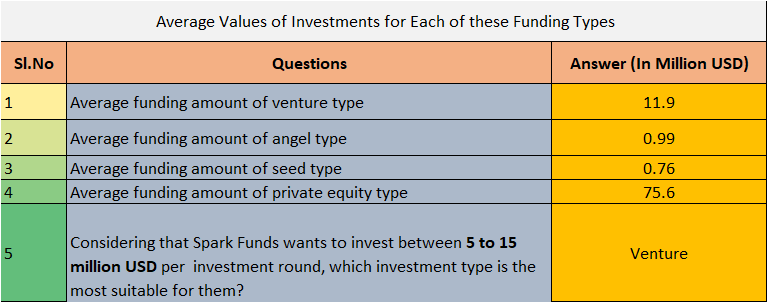

### <font color = green >Checkpoint#2<\font> over: 'venture' investment type is correct for investment between 5 to 15 million dollars

In [55]:
master_frame_venture = master_frame[master_frame.funding_round_type=='venture']

In [56]:
master_frame_venture.head()

,permalink,name,category_list,status,country_code,funding_round_permalink,funding_round_type,raised_amount_mill_usd
0,/organization/fame,#fame,Media,operating,IND,/funding-round/9a01d05418af9f794eebff7ace91f638,venture,10.000
4,/organization/0/6/com,0-6.com,Curated Web,operating,CHN,/funding-round/5727accaeaa57461bd22a9bdd945382d,venture,2.000
8,/organization/0ndine/biomedical/inc,Ondine Biomedical Inc.,Biotechnology,operating,CAN,/funding-round/954b9499724b946ad8c396a57a5f3b72,venture,0.719
10,/organization/0xdata,H2O.ai,Analytics,operating,USA,/funding-round/3bb2ee4a2d89251a10aaa735b1180e44,venture,20.000
11,/organization/0xdata,H2O.ai,Analytics,operating,USA,/funding-round/ae2a174c06517c2394aed45006322a7e,venture,1.700


In [57]:
 country_invest_heavy=master_frame_venture.groupby('country_code')['raised_amount_mill_usd'].sum().sort_values(ascending=False)

In [58]:
country_invest_heavy.head(9)

country_code
USA    399950.179
CHN     39101.773
GBR     18241.345
IND     14050.604
CAN      8825.477
FRA      6775.039
ISR      6503.020
DEU      6061.141
JPN      3242.031
Name: raised_amount_mill_usd, dtype: float64

In [59]:
#master_frame_top9 = country_invest_heavy.head(9)

In [60]:
master_frame_top9 = pd.DataFrame(country_invest_heavy.head(9))

In [61]:
master_frame_top9 = master_frame_top9.reset_index()

In [62]:
master_frame_top9

,country_code,raised_amount_mill_usd
0,USA,399950.179
1,CHN,39101.773
2,GBR,18241.345
3,IND,14050.604
4,CAN,8825.477
5,FRA,6775.039
6,ISR,6503.020
7,DEU,6061.141
8,JPN,3242.031


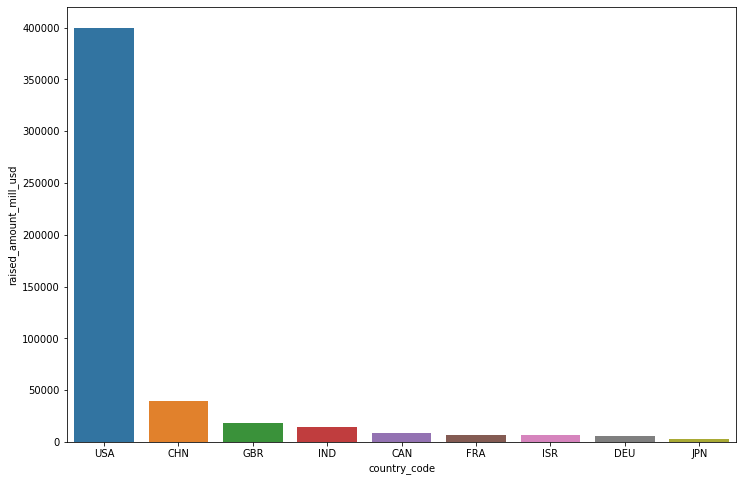

In [63]:
plt.figure(figsize=(12, 8))
sns.barplot(x ='country_code',y='raised_amount_mill_usd',data=master_frame_top9)
plt.show()

### <font color = magenta >Above mentioned is list of top9 country who receive highest investment 
#### <font color = red>From wikipedia link - Top 3 English speaking conuntries are 


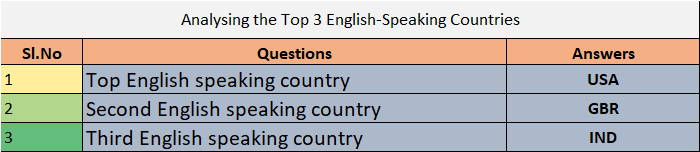

## <font color = green>Checkpoint#3 over: above table shows top 3 English speaking countries which are heavily invested

In [64]:
mapping=pd.read_csv("F:\\Upgrad\\Assigments\\Assignment1\\mapping.csv")

### <font color = red> Opened and replaced mapping file '0' values with 'na' assumed by mistake entered in data (done manually)

In [65]:
mapping.head()

,category_list,Automotive & Sports,Blanks,Cleantech / Semiconductors,Entertainment,Health,Manufacturing,"News, Search and Messaging",Others,"Social, Finance, Analytics, Advertising"
0,NaN,0,1,0,0,0,0,0,0,0
1,3D,0,0,0,0,0,1,0,0,0
2,3D Printing,0,0,0,0,0,1,0,0,0
3,3D Technology,0,0,0,0,0,1,0,0,0
4,Accounting,0,0,0,0,0,0,0,0,1


In [66]:
mapping.isna().sum()

category_list                              1
Automotive & Sports                        0
Blanks                                     0
Cleantech / Semiconductors                 0
Entertainment                              0
Health                                     0
Manufacturing                              0
News, Search and Messaging                 0
Others                                     0
Social, Finance, Analytics, Advertising    0
dtype: int64

In [67]:
# As per checkpoint need to extract prime sectors
prime_sector=master_frame_venture['category_list'].str.split('|',expand=True)

In [68]:
prime_sector.head()

,0,1,2,3,4,5,6,7,8,9,...,13,14,15,16,17,18,19,20,21,22
0,Media,None,None,None,None,None,None,None,None,None,...,None,None,None,None,None,None,None,None,None,None
4,Curated Web,None,None,None,None,None,None,None,None,None,...,None,None,None,None,None,None,None,None,None,None
8,Biotechnology,None,None,None,None,None,None,None,None,None,...,None,None,None,None,None,None,None,None,None,None
10,Analytics,None,None,None,None,None,None,None,None,None,...,None,None,None,None,None,None,None,None,None,None
11,Analytics,None,None,None,None,None,None,None,None,None,...,None,None,None,None,None,None,None,None,None,None


In [69]:
# Special function melt to merge all columns
prime_sec_melt=pd.melt(mapping, id_vars=['category_list'],value_vars=['Automotive & Sports', 'Blanks',
       'Cleantech / Semiconductors', 'Entertainment', 'Health',
       'Manufacturing', 'News, Search and Messaging', 'Others',
       'Social, Finance, Analytics, Advertising'])

In [70]:
prime_sec_melt.head(15)

,category_list,variable,value
0,NaN,Automotive & Sports,0
1,3D,Automotive & Sports,0
2,3D Printing,Automotive & Sports,0
3,3D Technology,Automotive & Sports,0
4,Accounting,Automotive & Sports,0
5,Active Lifestyle,Automotive & Sports,0
6,Ad Targeting,Automotive & Sports,0
7,Advanced Materials,Automotive & Sports,0
8,Adventure Travel,Automotive & Sports,1
9,Advertising,Automotive & Sports,0


In [71]:
# As prme sector with zero value are of no use
prime_sec_melt=prime_sec_melt[prime_sec_melt.value!=0]

In [72]:
prime_sec_melt

,category_list,variable,value
8,Adventure Travel,Automotive & Sports,1
14,Aerospace,Automotive & Sports,1
45,Auto,Automotive & Sports,1
46,Automated Kiosk,Automotive & Sports,1
47,Automotive,Automotive & Sports,1
...,...,...,...
6121,Social Recruiting,"Social, Finance, Analytics, Advertising",1
6122,Social Television,"Social, Finance, Analytics, Advertising",1
6123,Social Travel,"Social, Finance, Analytics, Advertising",1
6134,Stock Exchanges,"Social, Finance, Analytics, Advertising",1


In [73]:
# Mapping of data frame mapping on master_frame_venture
master_venture_prime_sec_melt=pd.merge(master_frame_venture,prime_sec_melt, how='inner',on='category_list')

In [74]:
#master_venture_prime_sec_melt=master_venture_prime_sec_melt.replace(r'\s*',np.nan,regex=True)

In [75]:
master_venture_prime_sec_melt.head()

,permalink,name,category_list,status,country_code,funding_round_permalink,funding_round_type,raised_amount_mill_usd,variable,value
0,/organization/fame,#fame,Media,operating,IND,/funding-round/9a01d05418af9f794eebff7ace91f638,venture,10.000,Entertainment,1
1,/organization/all/def/digital,All Def Digital,Media,operating,USA,/funding-round/452a2342fe720285c3b92e9bd927d9ba,venture,5.000,Entertainment,1
2,/organization/genius/monkey,Genius Monkey,Media,operating,USA,/funding-round/6651af18e8cec80b5df168d2e28cecb2,venture,2.000,Entertainment,1
3,/organization/marine/construction/technologies,Marine Construction Technologies,Media,operating,USA,/funding-round/9a549453415fd1711a34f51c9abca9e3,venture,0.125,Entertainment,1
4,/organization/media/group/of/america,Media Group of America,Media,operating,USA,/funding-round/048d7be2b85a3b017177b4d9b0f25faf,venture,1.500,Entertainment,1


In [76]:
# As per checkpoint variable reflect main sectors
master_venture_prime_sec_melt=master_venture_prime_sec_melt.rename({'variable':'main_sector'},axis=1)

In [77]:
# Main sectors result
master_venture_prime_sec_melt.groupby('main_sector').main_sector.count()

main_sector
Automotive & Sports                         190
Blanks                                      201
Cleantech / Semiconductors                 7121
Entertainment                              1104
Health                                     2413
Manufacturing                              1781
News, Search and Messaging                 2081
Others                                     7533
Social, Finance, Analytics, Advertising    2033
Name: main_sector, dtype: int64

## <font color = green> Checkpoint#4 over: we have sectorwise list

In [78]:
master_venture_prime_sec_melt.shape

(24457, 10)

In [79]:
master_venture_prime_sec_melt_5_15=master_venture_prime_sec_melt[master_venture_prime_sec_melt['raised_amount_mill_usd'].between(5.0,15.0)]

In [80]:
master_venture_prime_sec_melt_5_15.head()

,permalink,name,category_list,status,country_code,funding_round_permalink,funding_round_type,raised_amount_mill_usd,main_sector,value
0,/organization/fame,#fame,Media,operating,IND,/funding-round/9a01d05418af9f794eebff7ace91f638,venture,10.0,Entertainment,1
1,/organization/all/def/digital,All Def Digital,Media,operating,USA,/funding-round/452a2342fe720285c3b92e9bd927d9ba,venture,5.0,Entertainment,1
24,/organization/51hejia/com,51hejia.com,Curated Web,operating,CHN,/funding-round/bf4e80c20989c3608cca8d21d3b61d88,venture,10.0,"News, Search and Messaging",1
25,/organization/591wed,591wed,Curated Web,operating,CHN,/funding-round/5c26891d293a3fa58cc28f57d22e7353,venture,10.0,"News, Search and Messaging",1
30,/organization/aeropost,Aeropost,Curated Web,operating,USA,/funding-round/a9c7bccc9577cfdefbac54bb84ccba94,venture,5.0,"News, Search and Messaging",1


In [81]:
D_top3=master_venture_prime_sec_melt_5_15.groupby(['country_code','main_sector'])['raised_amount_mill_usd'].nlargest(3)

In [82]:
#D_top3['raised_amount_mill_usd'].sum().sort_values()

In [83]:
D_top3 = pd.DataFrame(D_top3).reset_index()

In [84]:
D_top3

,country_code,main_sector,level_2,raised_amount_mill_usd
0,ARE,Cleantech / Semiconductors,3810,12.00
1,ARE,"News, Search and Messaging",107,5.00
2,ARE,Others,11493,13.00
3,ARE,Others,23726,11.00
4,ARE,"Social, Finance, Analytics, Advertising",20641,5.25
...,...,...,...,...
510,VNM,Blanks,10129,6.00
511,VNM,Entertainment,23653,15.00
512,ZAF,Others,19492,6.03
513,ZAF,"Social, Finance, Analytics, Advertising",22252,10.00


In [85]:
D_top3= D_top3[(D_top3.country_code=='USA') | (D_top3.country_code=='IND')|(D_top3.country_code=='GBR')]

In [86]:
D_top3=D_top3.reset_index()

In [87]:
D_top3

,index,country_code,main_sector,level_2,raised_amount_mill_usd
0,219,GBR,Automotive & Sports,22810,12.430
1,220,GBR,Automotive & Sports,22799,9.346
2,221,GBR,Automotive & Sports,22823,7.576
3,222,GBR,Blanks,10058,14.000
4,223,GBR,Blanks,9976,10.000
...,...,...,...,...,...
74,503,USA,Others,6410,15.000
75,504,USA,Others,6604,15.000
76,505,USA,"Social, Finance, Analytics, Advertising",5602,15.000
77,506,USA,"Social, Finance, Analytics, Advertising",5633,15.000


In [88]:
D1=master_venture_prime_sec_melt_5_15[master_venture_prime_sec_melt_5_15['country_code']=='USA']

In [89]:
D1.head()

,permalink,name,category_list,status,country_code,funding_round_permalink,funding_round_type,raised_amount_mill_usd,main_sector,value
1,/organization/all/def/digital,All Def Digital,Media,operating,USA,/funding-round/452a2342fe720285c3b92e9bd927d9ba,venture,5.0,Entertainment,1
30,/organization/aeropost,Aeropost,Curated Web,operating,USA,/funding-round/a9c7bccc9577cfdefbac54bb84ccba94,venture,5.0,"News, Search and Messaging",1
32,/organization/akonix/systems,Akonix Systems,Curated Web,operating,USA,/funding-round/62d574f6151124d62742c2bdc68c64be,venture,11.0,"News, Search and Messaging",1
34,/organization/amberpoint,AmberPoint,Curated Web,acquired,USA,/funding-round/2c6a1960ca55d6e899047afe10a9cfcf,venture,13.6,"News, Search and Messaging",1
35,/organization/amberpoint,AmberPoint,Curated Web,acquired,USA,/funding-round/7e9c73a85d172b779c254eaabf6fd5f0,venture,9.0,"News, Search and Messaging",1


In [90]:
D2=master_venture_prime_sec_melt_5_15[master_venture_prime_sec_melt_5_15['country_code']=='GBR']

In [91]:
D3=master_venture_prime_sec_melt_5_15[master_venture_prime_sec_melt_5_15['country_code']=='IND']

In [92]:
#D1_3= pd.concat([D1,D2,D3],axis=0)

In [93]:
#D1_3.reset_index()

In [95]:
D1_plot=D1.groupby(['main_sector','country_code'])['main_sector'].count().nlargest(3).sort_values(ascending=False)
D2_plot=D2.groupby(['main_sector','country_code'])['main_sector'].count().nlargest(3).sort_values(ascending=False)
D3_plot=D3.groupby(['main_sector','country_code'])['main_sector'].count().nlargest(3).sort_values(ascending=False)

In [96]:
D1_plot=pd.DataFrame(D1_plot)
D2_plot=pd.DataFrame(D2_plot)
D3_plot=pd.DataFrame(D3_plot)

In [97]:
D2_plot

,,main_sector
main_sector,country_code,
Others,GBR,101
Cleantech / Semiconductors,GBR,95
"News, Search and Messaging",GBR,31


In [98]:
#D2_plot.rename_axis(['main_sec','country_code','country_code'],axis=1)
#D2_plot.set_index(['main_sec', 'country_code','raised_amount_mill_usd'], append=True)
D1_plot=D1_plot.rename(columns={'main_sector': 'main_count'})
D2_plot=D2_plot.rename(columns={'main_sector': 'main_count'})
D3_plot=D3_plot.rename(columns={'main_sector': 'main_count'})

In [99]:
D2_plot

,,main_count
main_sector,country_code,
Others,GBR,101
Cleantech / Semiconductors,GBR,95
"News, Search and Messaging",GBR,31


In [100]:
#D1_plot=D1_plot.iloc[ :3,:-3].reset_index()
#D2_plot=D2_plot.iloc[ :3,:-3].reset_index()
#D3_plot=D3_plot.iloc[ :3,:-3].reset_index()

In [101]:
D1_3_plt=pd.concat([D1_plot,D2_plot,D3_plot],axis=0).reset_index()

In [102]:
D1_3_plt

,main_sector,country_code,main_count
0,Others,USA,1924
1,Cleantech / Semiconductors,USA,1608
2,Health,USA,562
3,Others,GBR,101
4,Cleantech / Semiconductors,GBR,95
5,"News, Search and Messaging",GBR,31
6,Others,IND,73
7,"News, Search and Messaging",IND,29
8,"Social, Finance, Analytics, Advertising",IND,22


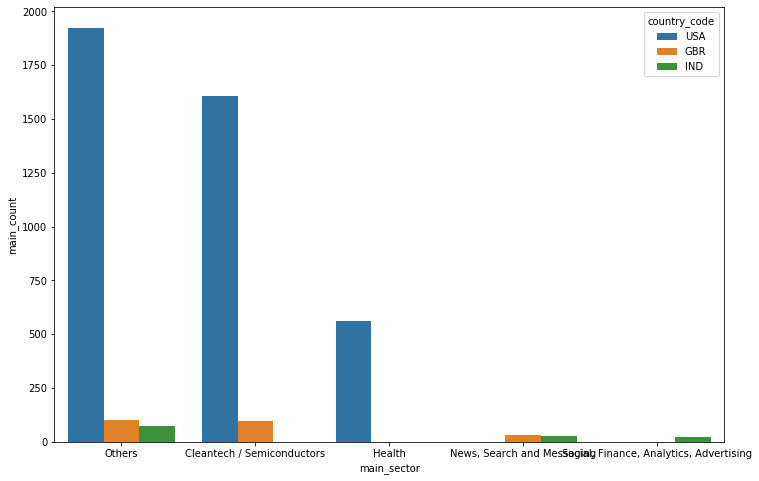

In [103]:
plt.figure(figsize=(12,8))
sns.barplot(y='main_count',x='main_sector',hue='country_code',data=D1_3_plt)
plt.show()

In [104]:
D1_count=D1.groupby('main_sector')['main_sector'].count()
D2_count=D2.groupby('main_sector')['main_sector'].count()
D3_count=D3.groupby('main_sector')['main_sector'].count()

In [105]:
D1_sum=D1.groupby('main_sector')['raised_amount_mill_usd'].sum()
D2_sum=D2.groupby('main_sector')['raised_amount_mill_usd'].sum()
D3_sum=D3.groupby('main_sector')['raised_amount_mill_usd'].sum()

## <font color = violet> Total investment counts

In [106]:
# Total number of investment count C1
D1_count.sum()

5714

In [107]:
# Total number of investment count C2
D2_count.sum()

329

In [108]:
# Total number of investment count C3
D3_count.sum()

183

## <font color = violet> Total investment sum

In [109]:
# Total sum of investment C1
round(D1_sum.sum(),2)

51216.47

In [110]:
# Total sum of investment C2
round(D2_sum.sum(),2)

2905.51

In [111]:
# Total sum of investment C3
round(D3_sum.sum(),2)

1616.12

## <font color = violet> Sector wise investment details

In [112]:
# Country C1 investment wise Top sector
top_sec_D1_1=D1.groupby('main_sector')['main_sector'].count().sort_values(ascending=False).nlargest(3).index[0]
top_sec_D1_1

'Others'

In [113]:
# Country C1 investment wise Top second sector
top_sec_D1_2=D1.groupby('main_sector')['main_sector'].count().sort_values(ascending=False).nlargest(3).index[1]
top_sec_D1_2

'Cleantech / Semiconductors'

In [114]:
# Country C1 investment wise Top Third sector
top_sec_D1_3=D1.groupby('main_sector')['main_sector'].count().sort_values(ascending=False).nlargest(3).index[2]
top_sec_D1_3

'Health'

In [115]:
# Country C2 investment wise Top sector
top_sec_D2_1=D2.groupby('main_sector')['main_sector'].count().sort_values(ascending=False).nlargest(3).index[0]
top_sec_D2_1

'Others'

In [116]:
# Country C2 investment wise Top second sector
top_sec_D2_2=D2.groupby('main_sector')['main_sector'].count().sort_values(ascending=False).nlargest(3).index[1]
top_sec_D2_2

'Cleantech / Semiconductors'

In [117]:
# Country C2 investment wise Top Third sector
top_sec_D2_3=D2.groupby('main_sector')['main_sector'].count().sort_values(ascending=False).nlargest(3).index[2]
top_sec_D2_3

'News, Search and Messaging'

In [118]:
# Country C3 investment wise Top sector
top_sec_D3_1=D3.groupby('main_sector')['main_sector'].count().sort_values(ascending=False).nlargest(3).index[0]
top_sec_D3_1

'Others'

In [119]:
# Country C3 investment wise Top second sector
top_sec_D3_2=D3.groupby('main_sector')['main_sector'].count().sort_values(ascending=False).nlargest(3).index[1]
top_sec_D3_2

'News, Search and Messaging'

In [120]:
# Country C3 investment wise Top Third sector
top_sec_D3_3=D3.groupby('main_sector')['main_sector'].count().sort_values(ascending=False).nlargest(3).index[2]
top_sec_D3_3

'Social, Finance, Analytics, Advertising'

## <font color = violet> Number of investment count in top sector

In [121]:
D1[D1.main_sector == top_sec_D1_1].shape[0]

1924

In [122]:
#D1[D1.main_sector == top_sec_D1].value.count()

In [123]:
D1[D1.main_sector == top_sec_D1_2].shape[0]

1608

In [124]:
D1[D1.main_sector == top_sec_D1_3].shape[0]

562

In [125]:
D2[D2.main_sector == top_sec_D2_1].shape[0]

101

In [126]:
D2[D2.main_sector == top_sec_D2_2].shape[0]

95

In [127]:
D2[D2.main_sector == top_sec_D2_3].shape[0]

31

In [128]:
D3[D3.main_sector == top_sec_D3_1].shape[0]

73

In [129]:
D3[D3.main_sector == top_sec_D3_2].shape[0]

29

In [130]:
D3[D3.main_sector == top_sec_D3_3].shape[0]

22

## <font color = violet> Company name Top sector

In [131]:
D1[D1.main_sector == top_sec_D1_1].sort_values(by = 'raised_amount_mill_usd', ascending = False).head(1)['name'].values[0]

'NantMobile'

In [132]:
D2[D2.main_sector == top_sec_D2_1].sort_values(by = 'raised_amount_mill_usd', ascending = False).head(1)['name'].values[0]

'Tribold'

In [133]:
D3[D3.main_sector == top_sec_D3_1].sort_values(by = 'raised_amount_mill_usd', ascending = False).head(1)['name'].values[0]

'ItzCash Card Ltd.'

In [134]:
D1[D1.main_sector == top_sec_D1_2].sort_values(by = 'raised_amount_mill_usd', ascending = False).head(1)['name'].values[0]

'Stion'

In [135]:
D2[D2.main_sector == top_sec_D2_2].sort_values(by = 'raised_amount_mill_usd', ascending = False).head(1)['name'].values[0]

'Elixent'

In [136]:
# Country 3
D3[D3.main_sector == top_sec_D3_2].sort_values(by = 'raised_amount_mill_usd', ascending = False).head(1)['name'].values[0]

'Mobile2Win India'

## <font color = green>Checkpoint#5 over: Got all results mentioned in Table 5.1

To plot the graphs and charts, we willbe using tableau.
Exporting some useful dataframes as .csv files to use them for the same.

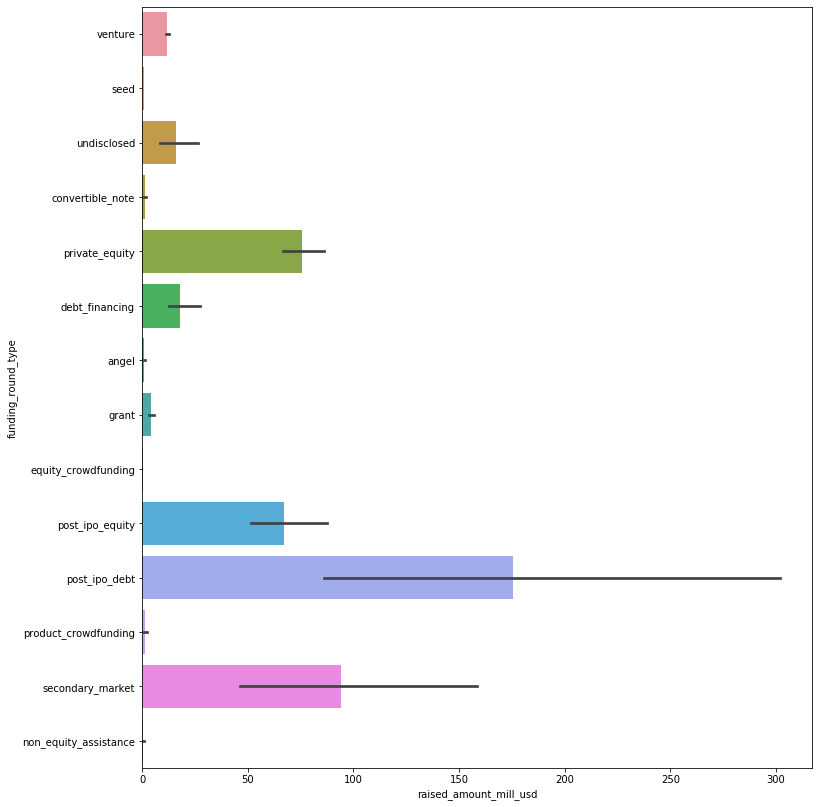

In [137]:
plt.figure(figsize=(12, 14))
sns.barplot(x='raised_amount_mill_usd',y='funding_round_type',data=master_frame)
plt.show()

In [138]:
master_frame_plot1=master_frame[(master_frame.funding_round_type=='venture')|(master_frame.funding_round_type=='private_equity')|(master_frame.funding_round_type=='seed')|(master_frame.funding_round_type=='angel')]

In [139]:
master_frame_plot1.head()

,permalink,name,category_list,status,country_code,funding_round_permalink,funding_round_type,raised_amount_mill_usd
0,/organization/fame,#fame,Media,operating,IND,/funding-round/9a01d05418af9f794eebff7ace91f638,venture,10.000
2,/organization/qounter,:Qounter,Application Platforms|Real Time|Social Network...,operating,USA,/funding-round/b44fbb94153f6cdef13083530bb48030,seed,0.700
4,/organization/0/6/com,0-6.com,Curated Web,operating,CHN,/funding-round/5727accaeaa57461bd22a9bdd945382d,venture,2.000
7,/organization/0ndine/biomedical/inc,Ondine Biomedical Inc.,Biotechnology,operating,CAN,/funding-round/2b9d3ac293d5cdccbecff5c8cb0f327d,seed,0.043
8,/organization/0ndine/biomedical/inc,Ondine Biomedical Inc.,Biotechnology,operating,CAN,/funding-round/954b9499724b946ad8c396a57a5f3b72,venture,0.719


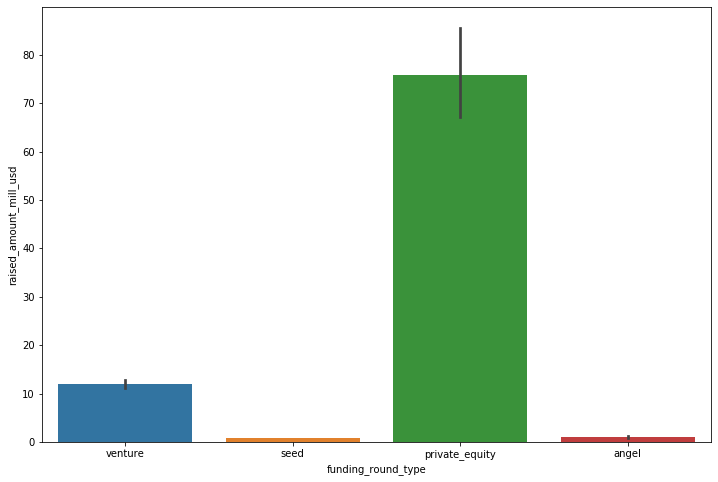

In [140]:
plt.figure(figsize=(12,8))
sns.barplot(x ='funding_round_type',y='raised_amount_mill_usd',data=master_frame_plot1)
plt.show()

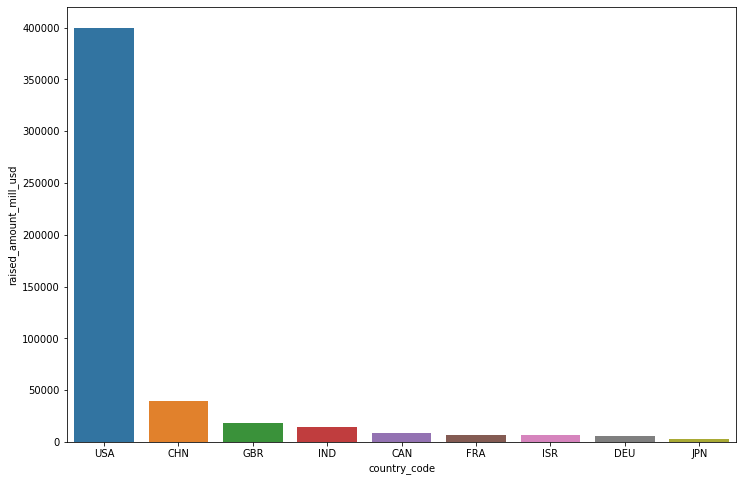

In [141]:
plt.figure(figsize=(12, 8))
sns.barplot(x ='country_code',y='raised_amount_mill_usd',data=master_frame_top9)
plt.show()

In [142]:
master_frame_plot2=master_frame_top9[(master_frame_top9.country_code=='USA')|(master_frame_top9.country_code=='GBR')|(master_frame_top9.country_code=='IND')]

In [143]:
master_frame_plot2

,country_code,raised_amount_mill_usd
0,USA,399950.179
2,GBR,18241.345
3,IND,14050.604


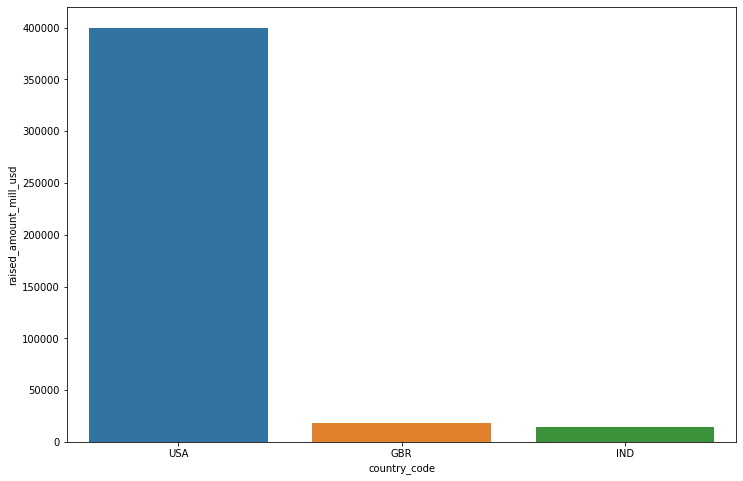

In [144]:
plt.figure(figsize=(12,8))
sns.barplot(x ='country_code',y='raised_amount_mill_usd',data=master_frame_plot2)
plt.show()

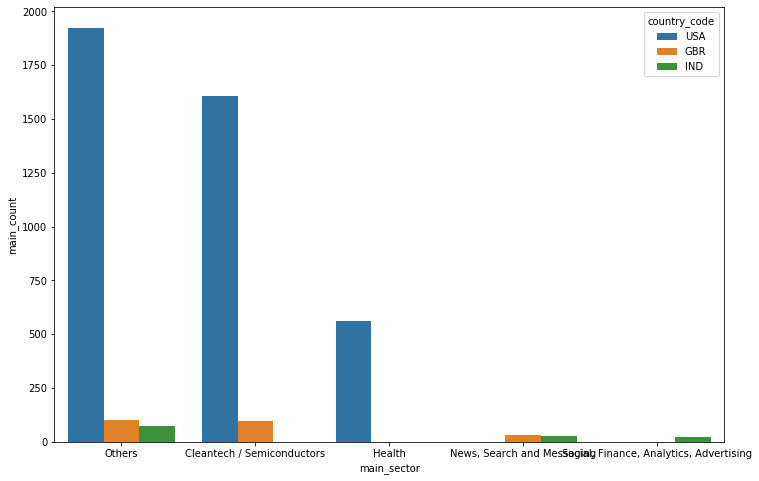

In [146]:
plt.figure(figsize=(12,8))
sns.barplot(y='main_count',x='main_sector',hue='country_code',data=D1_3_plt)
plt.show()